<span style="color:#04c921; font-size:24px; font-weight:700"> Logistic regression - Exercises</span>

Loans data captured information on loan repayment by individuals. We have 13 independent variables and 1 dependent variable called not.fully.paid. Build a logistic regreession model to predict if an individual is a loan defaulter or not. 

Load the loans dataset:

In [1]:
# load the loans dataset
loans_data = read.csv("/dsa/data/all_datasets/loans/loans.csv")

In [2]:
str(loans_data)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : chr  "debt_consolidation" "credit_card" "debt_consolidation" "debt_consolidation" ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 1:</span> What proportion of the loans in the dataset were not paid in full?

In [3]:
# Your code for activity 1 goes here..
library(plyr)
freq = count(loans_data,'not.fully.paid')
freq
paste("Proportion of unpaid loans is", 1533/(1533+8045))

not.fully.paid,freq
<int>,<int>
0,8045
1,1533


[1] "Proportion of unpaid loans is 0.160054291083734"

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 2:</span> split data into a training and testing set. **Use the seed as 144**. Put 70% data into train_data dataframe and 30% in test_data dataframe. 

In [4]:
# Your code for activity 2 goes here..
library(caTools)
set.seed(144)

split = sample.split(loans_data$not.fully.paid, SplitRatio=0.7)

# Train data will have 70% of data
train_data = subset(loans_data, split==TRUE)

# Test data will have the rest 30% of data
test_data = subset(loans_data, split==FALSE)


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 3:</span> Build a logistic regression model on train_data to predict not.fully.paid using all the independent variables. Run summary(). 

In [5]:
# Your code for activity 3 goes here..

predict_train = glm(not.fully.paid ~ ., data=train_data, family=binomial)

summary(predict_train)



Call:
glm(formula = not.fully.paid ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2049  -0.6205  -0.4951  -0.3606   2.6397  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                9.187e+00  1.554e+00   5.910 3.42e-09 ***
credit.policy             -3.368e-01  1.011e-01  -3.332 0.000861 ***
purposecredit_card        -6.141e-01  1.344e-01  -4.568 4.93e-06 ***
purposedebt_consolidation -3.212e-01  9.183e-02  -3.498 0.000469 ***
purposeeducational         1.347e-01  1.753e-01   0.768 0.442201    
purposehome_improvement    1.727e-01  1.480e-01   1.167 0.243135    
purposemajor_purchase     -4.830e-01  2.009e-01  -2.404 0.016203 *  
purposesmall_business      4.120e-01  1.419e-01   2.905 0.003678 ** 
int.rate                   6.110e-01  2.085e+00   0.293 0.769446    
installment                1.275e-03  2.092e-04   6.093 1.11e-09 ***
log.annual.inc            -4.337e

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 4:</span> Above model predict_train has some variables that are not significant. Remove the variables (purpose, int.rate, dti, days.with.cr.line, revol.util, delinq.2yrs) from the model and rebuild it. Name this new model predict_train1. Look for any change in the AIC value. 

In [6]:
# Your code for activity 4 goes here..
predict_train1 = glm(not.fully.paid ~ credit.policy + installment + log.annual.inc + fico 
                     + revol.bal + inq.last.6mths + pub.rec, data=train_data, family=binomial)

summary(predict_train1)



Call:
glm(formula = not.fully.paid ~ credit.policy + installment + 
    log.annual.inc + fico + revol.bal + inq.last.6mths + pub.rec, 
    family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1894  -0.6156  -0.5085  -0.3820   2.5298  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     9.197e+00  1.006e+00   9.145  < 2e-16 ***
credit.policy  -3.467e-01  1.001e-01  -3.463 0.000534 ***
installment     1.296e-03  1.850e-04   7.004 2.49e-12 ***
log.annual.inc -4.414e-01  6.814e-02  -6.478 9.30e-11 ***
fico           -9.164e-03  1.084e-03  -8.453  < 2e-16 ***
revol.bal       3.827e-06  1.102e-06   3.474 0.000513 ***
inq.last.6mths  8.988e-02  1.593e-02   5.641 1.69e-08 ***
pub.rec         3.197e-01  1.130e-01   2.830 0.004654 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5896.6  on 6704  degrees o

The AIC value has increased. A model with minimum AIC is the preferred one. So we will stick with the model `predict_train` for doing predictions on test dataset. 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 5:</span> Predict the outcomes on test dataset loans which are not being paid back in full. Store these **predicted probabilities** in a variable named predicted.risk.

In [8]:
# Your code for activity 5 goes here..
predicted.risk = predict(predict_train, type = "response", newdata=test_data)


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 6:</span> Compute the confusion matrix between variables not.fully.paid in test_data and predicted.risk using a threshold of 0.5

In [11]:
# Your code for activity 6 goes here..
c_matrix <- table(test_data$not.fully.paid, predicted.risk>0.5)
c_matrix

   
    FALSE TRUE
  0  2400   13
  1   457    3

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 7:</span> What is the accuracy of the model predict_train?

In [14]:
# Your answer for activity 7 goes here.

# Just do the math here using the numbers you got in above confusion matrix. No need of any code. 

# (TP + TN) / number of observations in the dataset
paste("Accuracy = (TP + TN) / total # obs =", round((3+2400)/(2400+13+457+3),4))
# In R, 0 = FALSE and 1 = TRUE, so the values for 0 are those that are paid, and the values for 1 are those that are
# not paid.

paste("Sensitivity = TP/(TP+FN) =", round(3/(3+457),4))
paste("Specificity = TN/(TN+FP) =", round(2400/(2400+13),4))

[1] "Accuracy = (TP + TN) / total # observations = 0.8364"

[1] "Sensitivity = TP/(TP+FN) = 0.0065"

[1] "Specificity = TN/(TN+FP) = 0.9946"

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 8:</span> What is the accuracy of the baseline model?

In [17]:
# Your answer for activity 8 goes here..

# Just do the math here using the numbers you got in above confusion matrix. No need of any code. 
# In the lab it asked us to predict the most frequent outcome for all obs to get baseline.
# The above instruction is to use numbers from the confusion matrix so I have included both.
paste("Baseline for all observations:", round(8045/(8045+1533),4))
paste("Baseline for test observations:", round((2400+13)/(2413+457+3),4))

[1] "Baseline for all observations: 0.8399"

[1] "Baseline for test observations: 0.8399"

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 9a:</span> Compute the AUC of the model predict_train using the ROCR package.

In [20]:
library(ROCR)
# Your answer for activity 9a goes here..
framingham_log = predict_train
predictTest = predict_test

predict_test = predict(predict_train, type="response", newdata=test_data)

ROCR_predictions = prediction(predict_test, test_data$not.fully.paid)

perf <- performance(ROCR_predictions,"tpr","fpr")


A performance instance
  'False positive rate' vs. 'True positive rate' (alpha: 'Cutoff')
  with 2874 data points

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 9b:</span> Plot the ROC curves for the model `predict_train` and `predict_train1`. 

[1] 0.6720995

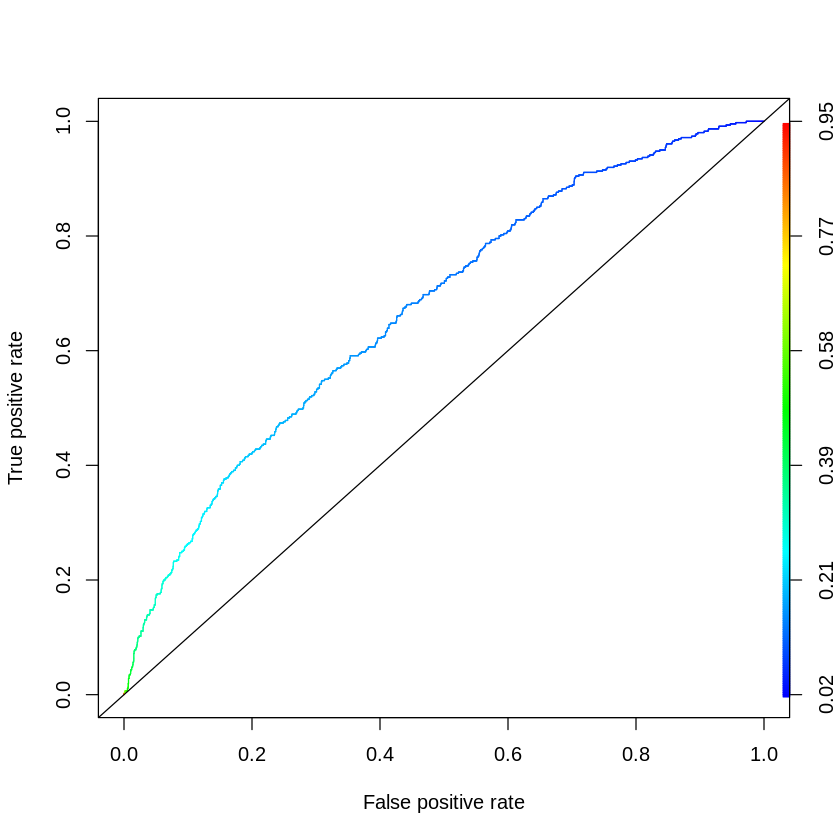

In [21]:
# Your answer for activity 9b goes here..
plot(perf,colorize=TRUE)
abline(0,1)
as.numeric(performance(ROCR_predictions,"auc")@y.values)


# Save your notebook!